Baseline MODEL 1 : Random

Baseline definition : random model binaire


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import random

df = pd.read_csv('data/netflow/CIDDS-001/traffic/mixed.csv', index_col='DATE')
df.shape
#filename = "data/mixed.csv"
#n = sum(1 for line in open(filename)) - 1
#s = 100000
#skip = sorted(random.sample(range(1,n+1),n-s)) 
#df = pd.read_csv(filename, skiprows=skip)


(11653215, 16)

In [2]:
from random import randrange

def random_algorithm(train, test):
    VBP = 0
    output_values = [i for i in train["ATTACK_TYPE"].unique()]
    predicted = list()
    for row in test:
        index = randrange(len(output_values))
        predicted.append(output_values[index])
    for k in range(len(predicted)):
        if train["ATTACK_TYPE"][k]==predicted[k]:
            VBP += 1 
    return (VBP*100/len(predicted))

train = df.copy()
train["ATTACK_TYPE"] = train["ATTACK_TYPE"].apply(lambda x: "attaque" if x != "benign" else x)
test = [None] * df.shape[0]

prediction = random_algorithm(train, test)
print(prediction)

50.01318520253853


Baseline definition : random model


In [3]:
from random import randrange

test = [None] * df.shape[0]

prediction = random_algorithm(df, test)
print(prediction)

19.997871831936507


MODEL 2


Matrice de corrélation

In [4]:
!pip install dython

In [5]:
print(df["CLASS"])
print("\ncolumns ==== ", df.columns)

0               normal
1               normal
2               normal
3               normal
4               normal
               ...    
11653210    suspicious
11653211    suspicious
11653212    suspicious
11653213    suspicious
11653214    suspicious
Name: CLASS, Length: 11653215, dtype: object

columns ====  Index(['DATE', 'DURATION', 'PROTOCOL', 'SRC_IP_ADDR', 'SRC_PORT',
       'DST_IP_ADDR', 'DST_PORT', 'PACKETS', 'BYTES', 'FLAGS', 'TOS', 'CLASS',
       'ATTACK_TYPE', 'ATTACK_ID', 'ATTACK_DESCRIPTION', 'TYPE'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


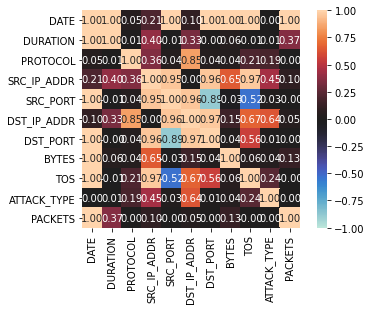

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f5c2f6afc90>,
 'corr':                  DATE  DURATION  PROTOCOL  ...       TOS  ATTACK_TYPE   PACKETS
 DATE         1.000000  1.000000  0.051143  ...  0.999867     0.000000  1.000000
 DURATION     1.000000  1.000000  0.006215  ... -0.009440     0.007361  0.365215
 PROTOCOL     0.051143  0.006215  1.000000  ...  0.210262     0.192603  0.004338
 SRC_IP_ADDR  0.207670  0.403885  0.357884  ...  0.966198     0.450934  0.095365
 SRC_PORT     0.999307 -0.012383  0.044423  ... -0.523486     0.027725 -0.000509
 DST_IP_ADDR  0.103141  0.333547  0.848042  ...  0.674883     0.639632  0.049315
 DST_PORT     0.999293 -0.004286  0.041696  ...  0.559059     0.011192  0.002703
 BYTES        0.999653  0.061031  0.039215  ...  0.057284     0.043029  0.125278
 TOS          0.999867 -0.009440  0.210262  ...  1.000000     0.241528 -0.004042
 ATTACK_TYPE  0.000000  0.007361  0.192603  ...  0.241528     1.000000  0.004182
 PACKETS      1.000000  0.365215  0

In [6]:
from dython.nominal import associations

df_reduce = df[['DATE', 'DURATION', 'PROTOCOL', 'SRC_IP_ADDR', 'SRC_PORT',
       'DST_IP_ADDR', 'DST_PORT', 'BYTES', 'TOS','ATTACK_TYPE','PACKETS']]
df_shuffled = df_reduce.sample(frac=1).reset_index(drop=True)
df_reduce = df_shuffled.iloc[:50000]
associations(df_reduce)


In [7]:
from collections import Counter

SRC_ATT = df[df["ATTACK_TYPE"] != "benign"]['SRC_IP_ADDR']
Liste_SRC_ATT = SRC_ATT.to_list()
l_sorted = Counter(Liste_SRC_ATT).most_common()
print("IP_SRC_ATT" , l_sorted)

SRC = df[df["ATTACK_TYPE"] == "benign"]['SRC_IP_ADDR']
Liste_SRC = SRC.to_list()
l_sorted = Counter(Liste_SRC).most_common()
print("\nIP_SRC_NON_ATT" , l_sorted)

PROTO_ATT = df[df["ATTACK_TYPE"] != "benign"]['PROTOCOL']
Liste_PROTO_ATT = PROTO_ATT.to_list()
l_sorted = Counter(Liste_PROTO_ATT).most_common()
print("\nPROTO_ATT" , l_sorted)

PROTO = df[df["ATTACK_TYPE"] == "benign"]['PROTOCOL']
Liste_PROTO = PROTO.to_list()
l_sorted = Counter(Liste_PROTO).most_common()
print("\nPROTO_NON_ATT" , l_sorted)

IP_SRC_ATT [('192.168.220.15', 910375), ('192.168.100.6', 855542), ('EXT_SERVER', 17814), ('ATTACKER1', 12300), ('ATTACKER2', 10988), ('192.168.220.1', 3987), ('192.168.210.3', 3930), ('192.168.210.2', 3809), ('192.168.210.1', 3753), ('192.168.100.2', 2358), ('192.168.100.5', 2253), ('192.168.100.3', 2211), ('192.168.220.2', 2205), ('192.168.100.4', 2039), ('192.168.100.1', 2008), ('ATTACKER3', 1232), ('192.168.210.5', 481), ('192.168.210.4', 445), ('192.168.200.2', 2), ('192.168.200.3', 1), ('192.168.200.4', 1), ('192.168.200.8', 1), ('192.168.200.9', 1), ('192.168.200.1', 1), ('192.168.200.5', 1)]

IP_SRC_NON_ATT [('192.168.220.15', 1018094), ('EXT_SERVER', 712701), ('DNS', 613558), ('192.168.200.8', 372314), ('192.168.220.4', 316966), ('192.168.220.14', 256904), ('192.168.210.5', 254802), ('192.168.220.7', 239092), ('192.168.220.13', 230469), ('192.168.220.16', 211606), ('192.168.220.11', 211546), ('192.168.220.9', 185099), ('192.168.220.6', 182158), ('192.168.100.5', 159400), ('192

MODEL PROCEDURAL 1

In [8]:
def procedural_model1(df):
  test = [None] * df.shape[0]
  VBP = 0
  predicted = list()
  for i in range (len(df)):
    if df['PROTOCOL'][i] in ['GRE','IGMP']:
      predicted.append("benign")
    elif df["SRC_IP_ADDR"][i][:7] != '192.168':
      predicted.append("benign")
    else :
      predicted.append("attaque")
  for k in range(len(predicted)):
    if train["ATTACK_TYPE"][k]==predicted[k]:
            VBP += 1 
  return (VBP*100/len(predicted))

#train["ATTACK_TYPE"] = train["ATTACK_TYPE"].apply(lambda x: "attaque" if x != "benign" else x)

print(procedural_model1(train))

61.11255992445003


MODEL PROCEDURAL 2

In [9]:
from collections import Counter

DST_IP_ADDR_ATT = df[df["ATTACK_TYPE"] != "benign"]['DST_IP_ADDR']
Liste_DST_IP_ADDR_ATT = DST_IP_ADDR_ATT.to_list()
l_sorted = Counter(Liste_DST_IP_ADDR_ATT).most_common()
print("DST_IP_ADDR_ATT" , l_sorted)

DST_IP_ADDR = df[df["ATTACK_TYPE"] == "benign"]['DST_IP_ADDR']
Liste_DST_IP_ADDR = DST_IP_ADDR.to_list()
l_sorted = Counter(Liste_DST_IP_ADDR).most_common()
print("\nDST_IP_ADDR_NON_ATT" , l_sorted)

TOS_ATT = df[df["ATTACK_TYPE"] != "benign"]['TOS']
Liste_TOS_ATT = TOS_ATT.to_list()
l_sorted = Counter(Liste_TOS_ATT).most_common()
print("\nTOS_ATT" , l_sorted)

TOS_VICT = df[df["ATTACK_TYPE"] == "benign"]['TOS']
Liste_TOS = TOS_VICT.to_list()
l_sorted = Counter(Liste_TOS).most_common()
print("\nTOS_ATT_NON_ATT" , l_sorted)

DST_IP_ADDR_ATT [('192.168.220.15', 885029), ('192.168.100.6', 857161), ('EXT_SERVER', 24520), ('192.168.210.4', 10523), ('ATTACKER1', 9568), ('192.168.210.5', 9158), ('ATTACKER2', 7014), ('192.168.210.3', 3967), ('192.168.210.2', 3830), ('192.168.210.1', 3753), ('192.168.220.255', 2373), ('192.168.100.2', 2362), ('192.168.100.5', 2251), ('192.168.220.2', 2204), ('192.168.100.3', 2204), ('192.168.220.1', 2199), ('192.168.100.4', 2039), ('192.168.100.1', 2008), ('ATTACKER3', 1232), ('192.168.210.0', 35), ('192.168.210.255', 35), ('192.168.100.255', 19), ('192.168.210.179', 16), ('192.168.100.0', 16), ('192.168.210.36', 13), ('192.168.210.241', 13), ('192.168.210.29', 13), ('192.168.210.6', 12), ('192.168.210.15', 12), ('192.168.210.24', 12), ('192.168.210.42', 12), ('192.168.210.51', 12), ('192.168.210.60', 12), ('192.168.210.69', 12), ('192.168.210.78', 12), ('192.168.210.87', 12), ('192.168.210.96', 12), ('192.168.210.105', 12), ('192.168.210.114', 12), ('192.168.210.123', 12), ('192.

In [10]:
def procedural_model2(df):
  test = [None] * df.shape[0]
  VBP = 0
  predicted = list()
  for i in range (len(df)):
    if df['DST_IP_ADDR'][i] != '192.168.100.6':
      predicted.append("benign")
    elif df["TOS"][i] in ['32','16']:
      predicted.append("benign")
    else :
      predicted.append("attaque")
  for k in range(len(predicted)):
    if train["ATTACK_TYPE"][k]==predicted[k]:
            VBP += 1 
  return (VBP*100/len(predicted))

print(procedural_model2(train))

91.56090400803555


MODEL PROCEDURAL 3

In [11]:
def procedural_model3(df):
  test = [None] * df.shape[0]
  VBP = 0
  predicted = list()
  for i in range (len(df)):
    if df['BYTES'][i] / df['DURATION'][i] < 20 :
      predicted.append("attaque")
    elif df['PROTOCOL'][i] == "TCP" and df['BYTES'][i] / df['DURATION'][i] < 40:
      predicted.append("attaque")
    elif df["TOS"][i] in ['32','16']:
      predicted.append("benign")
    elif df['PROTOCOL'][i] in ['GRE','IGMP']:
      predicted.append("benign")
    else :
      predicted.append("attaque")
  for k in range(len(predicted)):
    if train["ATTACK_TYPE"][k]==predicted[k]:
            VBP += 1 
  return (VBP*100/len(predicted))

print(procedural_model3(train))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


15.770223067196477
